## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE519

/content/drive/MyDrive/CSE519


# Download data from Kaggle

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

{}

In [5]:
! mkdir ~/.kaggle

In [6]:

! cp kaggle.json ~/.kaggle/

In [7]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

commonlit-evaluate-student-summaries.zip: Skipping, found more recently modified local copy (use --force to force download)


# Alternate: download data using gdown (if having issues with Kaggle)

In [8]:
!pip install gdown

In [9]:
import gdown
url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
gdown.download(url)

Downloading...
From: https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM
To: /content/drive/MyDrive/CSE519/commonlit-evaluate-student-summaries.zip
100%|██████████| 1.10M/1.10M [00:00<00:00, 90.8MB/s]


'commonlit-evaluate-student-summaries.zip'

# Extract data and install packages (regardless of data acquisition method)

In [10]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
replace prompts_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install spacy
!pip install language-tool-python
!pip install tabulate
### END

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [4]:
### TODO: Load required packages
### Student's code here
import language_tool_python
import matplotlib.pyplot as plt
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
import spacy
import string
import warnings
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from xgboost import XGBRegressor
nltk.download('stopwords')
nltk.download('wordnet')
tool = language_tool_python.LanguageTool('en-US')
warnings.filterwarnings("ignore", category=FutureWarning)
###

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

<b>References:</b><br>
<ol>
    <li><a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html#:~:text=2014-,The%20pd.,information%20from%20the%20two%20inputs">Join operation, merge()</a></li>
    <li><a href="https://www.w3resource.com/pandas/series/series-astype.php#:~:text=The%20astype()%20function%20is,to%20a%20specified%20data%20type.&text=Use%20a%20numpy.,and%20dtype%20is%20a%20numpy.">Converting to desired datatype, .astype()</a></li>
</ol>



In [6]:
df1 = pd.read_csv('/content/drive/MyDrive/CSE519/summaries_train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/CSE519/prompts_train.csv')

df = pd.merge(df1, df2, on="prompt_id")
df['prompt_id'] = df['prompt_id'].astype(str)
df['student_id'] = df['student_id'].astype(str)
df['text'] = df['text'].astype(str)
df['prompt_question'] = df['prompt_question'].astype(str)
df['prompt_title'] = df['prompt_title'].astype(str)
df['prompt_text'] = df['prompt_text'].astype(str)
df.head()


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


## **Section 2: Features (Q2 and Q3, 25 points total)**


Description: The following code cell is a combination of Q2 and Q3. The "new row" dict has first 7 entries that belong to Q2 and the following 5 rows are related to Q3. <br>


<br>
Q3: I have used the following features to my list of features:<ol>
<li> <b> Number of rare words:</b> By rare words, I mean the words that are not stop words as defined in the nltk.stopwords such as the, as, is, a, etc. This metric should be helpful to decide how detailed and objective a summary is written by a student. Theoretically, it should show some kind of correlation with both content and wording. This is calculated using both <i>NLTK and Spacy</i> libraries
<li> <b> Number of grammatical errors:</b> To detect this, I have used the library called <i>language_tool_python</i>. This library is a Python wrapper for the <a href="https://languagetool.org/">Language Tool</a> and can be called directly using a function. Theoretically, this metric should show negative correlation to both content and wording values.
<li> <b> Maximum Length a Word:</b> My thought process towards selecting this as a metric was that if max length of a valid word is big, it might be harder to read thereby reducing the readability of the text. Conversely, it can also mean that a bigger word is a better vocab word which may have added to the content score of a summary.
<li> <b>Number of Punctuations</b>: This was calculated using the <i>string</i> python library. This library can automatically detect if a given char is a punctuation. It is possible that more number of punctuations can mean more grammatically correct sentences and thus more score.
<li> <b>Sum of adjectives and adverbs in the summary:</b> This metric is again calculated using <i>Spacy</i> library. This library can tag words in a sentence with encoded labels of parts of speech. Theoretically, this should show a positive correlation with both content and wording.
</ol> <br>

<h3>References:<h3>
<ol><li> <a href="https://pypi.org/project/language-tool-python/">language_tool_python</a>
<li> <a href="https://www.geeksforgeeks.org/removing-stop-words-nltk-python/">Removing Stop Words</a>
<li><a href="https://spacy.io/usage/spacy-101">Spacy tutorial with tokenization of word</a>
<li><a href="https://www.w3schools.com/python/python_lists_comprehension.asp">List comprehension Python</a> <br>
</ol>

<b>Note for the TA:</b> <br>
The following code snippet takes around 40 mins. Instead I have provided .csv file with submission that can be directly loaded (see the 2 cells below where I have loaded this .csv file)

<h1> Question 2 </h1>

In [7]:
###################### Functions defined here
def get_num_mistakes(text):
  err = tool.check(text)
  return len(err)

def get_max_wordlength(text):
  words = text.split(" ")
  max = 0
  for i in words:
    if len(i) > max:
      max = len(i)
  return max

def get_num_uncommon_words(text, nlp):
  tokenized_words = nlp(text)
  common_words = set(stopwords.words('english'))
  uncommon_count = 0
  for i in tokenized_words:
    if i.text.lower() not in common_words:
      uncommon_count+=1
  return uncommon_count

def get_num_punct(text):
  sum = 0
  for char in text:
    if char in string.punctuation:
      sum+=1
  return sum

def get_sum_adjv(text, nlp):
  tokenized_words = nlp(text)
  count = 0
  for token in tokenized_words:
    if token.pos_ == 'ADJ' or token.pos_ == 'ADV':
      count+=1
  return count

def num_words(text):
  return len(text.split(" "))
######################

column_names = ['student_num_words', 'prompt_num_words', 'num_words_distinct_student', 'num_words_distinct_prompt',
                'num_common_words_prompt','num_common_words_question','num_common_words_title','num_rare_words','num_grammatical_mistakes',
                'max_word_length']
df_subquestion2 = pd.DataFrame(columns = column_names)

nlp = spacy.load('en_core_web_sm')
for row in df.iterrows():
  text = row[1]["text"]
  prompt_text = row[1]["prompt_text"]
  new_row = {
      'student_num_words': num_words(text),
      'prompt_num_words' : num_words(prompt_text),
      'num_words_distinct_student' : len(set(text.split(" "))),
      'num_words_distinct_prompt' : len(set(prompt_text.split(" "))),
      'num_common_words_prompt' : len([word for word in text.split(" ") if word in prompt_text.split(" ")]),
      'num_common_words_question' : len([word for word in text.split(" ") if word in row[1]["prompt_question"].split(" ")]),
      'num_common_words_title' : len([word for word in text.split(" ") if word in row[1]["prompt_title"].split(" ")]),
      'num_rare_words': get_num_uncommon_words(text,nlp),
      'num_grammatical_mistakes' : get_num_mistakes(text),
      'max_word_length': get_max_wordlength(text),
      'num_punctuations': int(get_num_punct(text)),
      'num_adj+adv': int(get_sum_adjv(text,nlp))
  }
  df_subquestion2 = df_subquestion2.append(new_row, ignore_index=True)
df_subquestion2['wording'] = df['wording']
df_subquestion2['content'] = df['content']
df_subquestion2.head()
tool.close()

,student_num_words,prompt_num_words,num_words_distinct_student,num_words_distinct_prompt,num_common_words_prompt,num_common_words_question,num_common_words_title,num_rare_words,num_grammatical_mistakes,max_word_length,num_punctuations,num_adj+adv
0,61,597,51,304,30,5,2,39,3,12,3.0,8.0
1,206,597,139,304,105,40,11,140,15,19,30.0,17.0
2,60,597,50,304,35,9,1,39,3,11,9.0,8.0
3,76,597,59,304,52,22,1,48,4,12,10.0,9.0
4,27,597,25,304,16,6,1,17,3,11,2.0,6.0


In [30]:
file_path = 'new_features.csv'
df_subquestion2.to_csv(file_path, index=False)

## **Section 3: Content and Wording (Q4, 10 points)**

<h1>Answers for Q4</h1>

<ol>
<li> The range of values for content is from -1.7298 -> 3.9003.
<li> The range of values for wording is from -1.9626 -> 4.3107.
<li> From the correlation matrix and the heatmap drawn below, it is evident that the correlation is very strong and positive with a value of 0.75 between content and wording. This should mean that essays with good content rating are likely to have a good wording rating as well.
<li> The shape of scatter plots between content and wording for different prompts seem to be similar except for the fact that the number of points in all the prompts are differnt.
<li> For different histograms of 'content' for different prompt ids, the distributions have a common attribute of being right skewed where higher values are awarded to very few records compared to others. However, there are some differences in the exact shapes of the distributions.
<li> For different histograms of 'wording' for different prompt ids, the distributions of prompt ids 39c16e and 3b9047 are similar. However, the other 2 distributions differ a lot from each other and from the first two. There is some about of right-skew being observed in most of the graphs
</ol>


<h3>References </h3>

<ol><li> <a href="https://stackoverflow.com/questions/47006617/finding-max-min-value-of-individual-columns">Finding min/max values in a dataframe</a>
<li> <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/">Scatter Plot Tutorial</a>
<li><a href="https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/">Histogram Tutorial</a>
<li><a href="https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/">Plotting multiple plots together in Python</a>
<li><a href="https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/">Correlation Matrix</a>
<li><a href="https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e">Heatmap using seaborn in Python</a>
</ol>



In [7]:
df_subquestion2 = pd.read_csv('/content/drive/MyDrive/CSE519/new_features.csv') #Need to replace the path for CSV file path here.

In [8]:
min_value = df['content'].min()
max_value = df['content'].max()

print(f"Minimum value in the column: {min_value}")
print(f"Maximum value in the column: {max_value}")

min_value = df['wording'].min()
max_value = df['wording'].max()

print(f"Minimum value in the column: {min_value}")
print(f"Maximum value in the column: {max_value}")

Minimum value in the column: -1.72985945253881
Maximum value in the column: 3.90032610436019
Minimum value in the column: -1.96261379376134
Maximum value in the column: 4.3106931513921


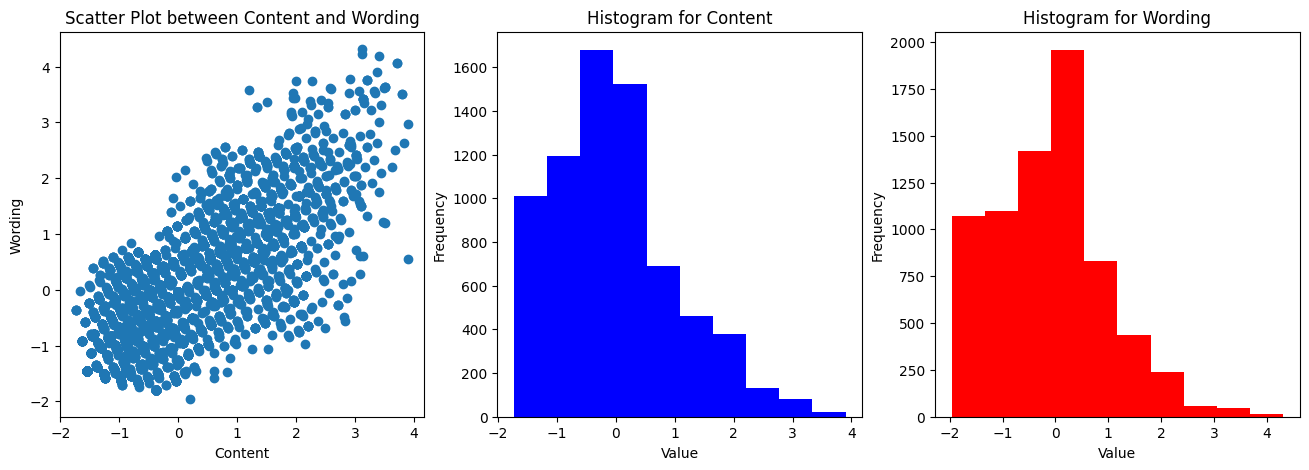

In [9]:
plt.figure(figsize=(16, 5))
plt.subplot(1,3,1)
plt.scatter(df['content'],df['wording'])
plt.xlabel('Content')
plt.ylabel('Wording')
plt.title('Scatter Plot between Content and Wording')

plt.subplot(1, 3, 2)
plt.hist(df['content'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Content')

plt.subplot(1, 3, 3)
plt.hist(df['wording'], bins=10, color='red', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Wording')
plt.show()


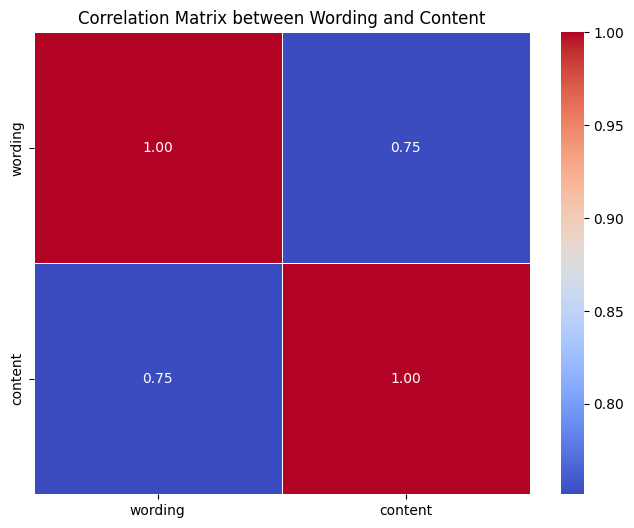

In [10]:
correlation_matrix = df[["wording", "content"]].corr()
# Using Matplotlib to visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title("Correlation Matrix between Wording and Content")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

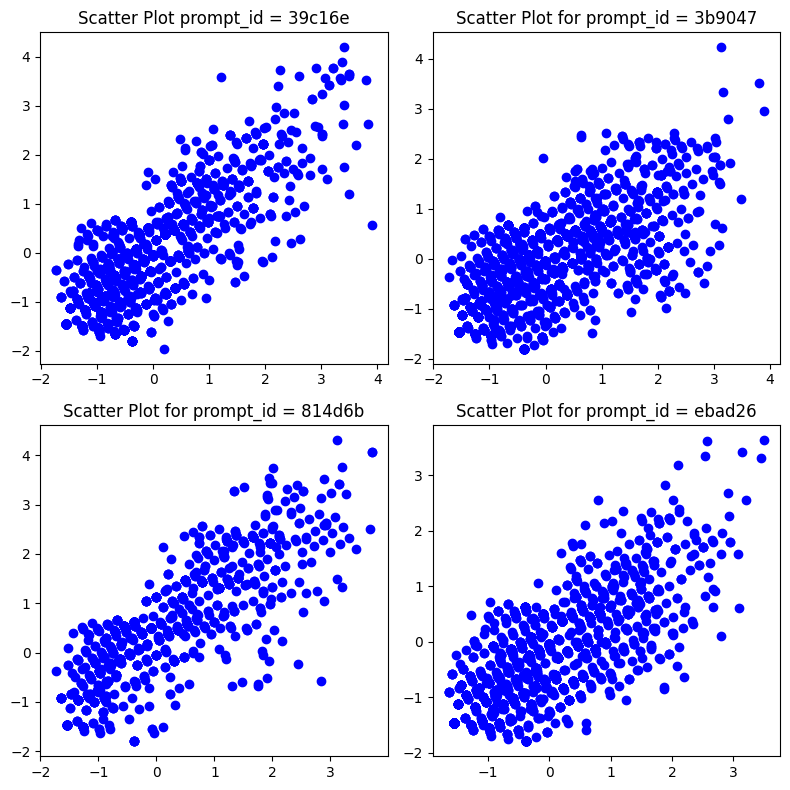

In [11]:
# #Scatter Plots for different prompts:

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
df1 = df[df["prompt_id"]=='39c16e']
plt.scatter(df1['content'], df1['wording'], c='blue')
plt.title('Scatter Plot prompt_id = 39c16e')

plt.subplot(2, 2, 2)
df1 = df[df["prompt_id"]=='3b9047']
plt.scatter(df1['content'], df1['wording'], c='blue')
plt.title('Scatter Plot for prompt_id = 3b9047')

plt.subplot(2, 2, 3)
df1 = df[df["prompt_id"]=='814d6b']
plt.scatter(df1['content'], df1['wording'], c='blue')
plt.title('Scatter Plot for prompt_id = 814d6b')

plt.subplot(2, 2, 4)
df1 = df[df["prompt_id"]=='ebad26']
plt.scatter(df1['content'], df1['wording'], c='blue')
plt.title('Scatter Plot for prompt_id = ebad26')

plt.tight_layout()

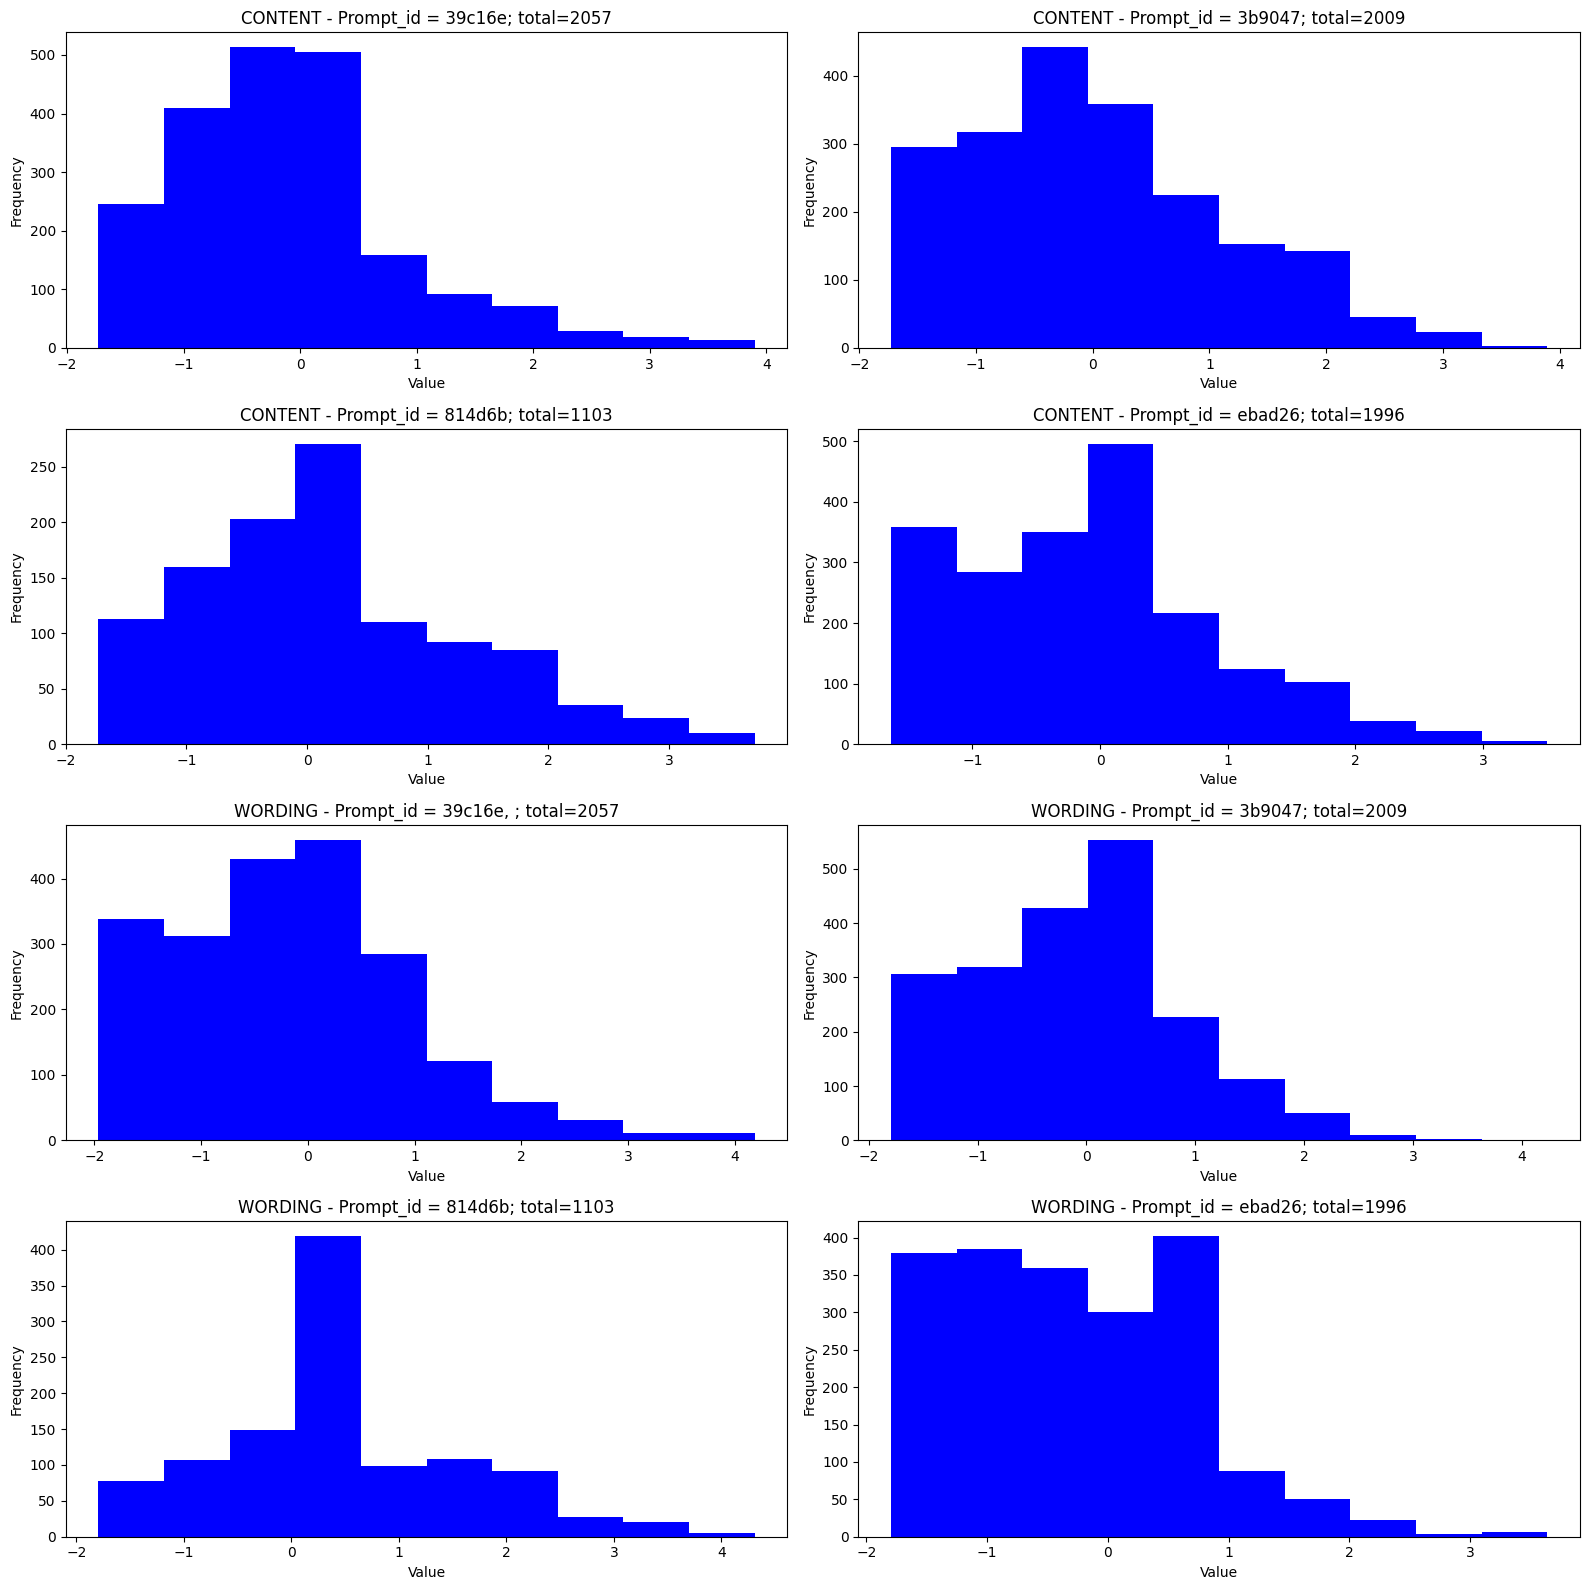

In [12]:
plt.figure(figsize=(16,16))

plt.subplot(4, 2, 1)
df1 = df[df["prompt_id"]=='39c16e']
plt.hist(df1['content'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'CONTENT - Prompt_id = 39c16e; total={len(df1["content"])}')

plt.subplot(4,2,2)
df1 = df[df["prompt_id"]=='3b9047']
plt.hist(df1['content'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'CONTENT - Prompt_id = 3b9047; total={len(df1["content"])}')

plt.subplot(4,2,3)
df1 = df[df["prompt_id"]=='814d6b']
plt.hist(df1['content'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'CONTENT - Prompt_id = 814d6b; total={len(df1["content"])}')

plt.subplot(4,2,4)
df1 = df[df["prompt_id"]=='ebad26']
plt.hist(df1['content'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'CONTENT - Prompt_id = ebad26; total={len(df1["content"])}')

plt.subplot(4, 2, 5)
df1 = df[df["prompt_id"]=='39c16e']
plt.hist(df1['wording'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'WORDING - Prompt_id = 39c16e, ; total={len(df1["content"])}')

plt.subplot(4,2,6)
df1 = df[df["prompt_id"]=='3b9047']
plt.hist(df1['wording'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'WORDING - Prompt_id = 3b9047; total={len(df1["content"])}')

plt.subplot(4,2,7)
df1 = df[df["prompt_id"]=='814d6b']
plt.hist(df1['wording'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'WORDING - Prompt_id = 814d6b; total={len(df1["content"])}')

plt.subplot(4,2,8)
df1 = df[df["prompt_id"]=='ebad26']
plt.hist(df1['wording'], bins=10, color='blue', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'WORDING - Prompt_id = ebad26; total={len(df1["content"])}')

plt.tight_layout()

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

<h3> Answer for Q5</h3>
Answer: Top 5 over-represented words in good essays and under-represented words in bad essays: 1) Meat, 2) Student, 3) People, 4) Tragedy, 5) Class <br>
Top 5 over-represented words in bad essays and under-represented words in good essays: 1) Imitate, 2) Plan, 3) Excite, 4) Arrange, 5) Chop


For marking an essay as good or bad, I have generated a score of an essay which is the sum of wording and content rating. The scores above the <b>median</b> score are marked as good (1) and others are marked as bad (0)<br>
Other method that can be implemented is: marking all the positive scores as 1 and negative scores as 0. <br>

To gauge whether a word is over represented in good essays and under-represented in bad essays, I have computed the <b>statistic</b>:
<br> <b><i>"Number of instances of a word in good essays" - "Number of instances of the same word in bad essays"</b></i> as a metric to compare different words. Vice-versa is applied to find words that are over-represented in bad essays<br>

I have lemmatized the words to their base form to avoid multiple entities for similar words such as "read" and "reads" will be converted to "read"
<br>

<h3>References </h3>

<ol><li> <a href="https://www.w3schools.com/python/pandas/ref_df_median.asp">df.median()</a>
<li> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html">sklearn - CountVectorizer</a>
<li><a href="https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/">Tutorial - Count Vectorizer</a>
<li><a href="https://www.programiz.com/python-programming/methods/built-in/zip">Python ZIP()</a>
<li><a href="https://www.geeksforgeeks.org/python-lemmatization-with-nltk/">Lemmatization with NLTK tutorial</a>
<li><a href="https://www.geeksforgeeks.org/bar-plot-in-matplotlib">Bar Graph Tutorial</a>
</ol>

In [13]:
#Creating a new Dataframe for addressing this particular question
#'Score' represents the addition of content and wording score
#'goodOrBad' is 1 for scores above the median score and others are tagged as 0

df_ques4 = df
df_ques4['score'] = df_ques4['content'] + df_ques4['wording']
df_ques4['goodORbad'] = df_ques4['score'] > df_ques4['score'].median()
df_ques4['goodORbad'] = df_ques4['goodORbad'].astype(int)

In [14]:
df_good = df_ques4[df_ques4["goodORbad"]==1]
text = ''.join(df_good['text'])
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
vectorizer.fit([text])
input_numeric = vectorizer.transform([text])
feature_names = vectorizer.get_feature_names_out()
values = input_numeric.toarray()[0]


In [15]:
word_count_pairs = list(zip(feature_names, values))
lemmatizer = WordNetLemmatizer()
aggregated_counts_good = {}
for word, count in word_count_pairs:
    lemma = lemmatizer.lemmatize(word)
    if lemma in aggregated_counts_good:
        aggregated_counts_good[lemma] += count
    else:
        aggregated_counts_good[lemma] = count

In [16]:
df_bad = df_ques4[df_ques4["goodORbad"]==0]
text = ''.join(df_bad['text'])
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
vectorizer.fit([text])
input_numeric = vectorizer.transform([text])
feature_names = vectorizer.get_feature_names_out()
values = input_numeric.toarray()[0]

In [17]:
word_count_pairs = list(zip(feature_names, values))
lemmatizer = WordNetLemmatizer()
aggregated_counts_bad = {}
for word, count in word_count_pairs:
    lemma = lemmatizer.lemmatize(word)
    if lemma in aggregated_counts_bad:
        aggregated_counts_bad[lemma] += count
    else:
        aggregated_counts_bad[lemma] = count


In [18]:
differences = {}
warnings.filterwarnings("ignore", category=FutureWarning)
columns = ['word','good','bad','difference']
df_diff = pd.DataFrame()
for key in aggregated_counts_bad:
    if key in aggregated_counts_good:
      differences[key] = aggregated_counts_good[key] - aggregated_counts_bad[key]
      record = {'word':key, 'good':aggregated_counts_good[key], 'bad':aggregated_counts_bad[key], 'difference':differences[key]}
      df_diff = df_diff.append(record, ignore_index=True)
final_list_good = sorted(differences.items(), key =lambda x:x[1], reverse= True)
final_list_bad = sorted(differences.items(), key =lambda x:x[1])
list_words_good = [key for key,value in final_list_good[:10]]
list_words_bad = [key for key,value in final_list_bad[:10]]
display(df_diff.sort_values(by='difference'))
# df_diff = df_diff[df_diff['word'].isin(list_words_good.append(list_words_bad))]
print(list_words_bad)

,word,good,bad,difference
317,imitate,121,224,-103
495,plan,261,352,-91
202,excite,195,270,-75
22,arranged,115,188,-73
90,chop,182,220,-38
...,...,...,...,...
93,class,1793,795,998
700,tragedy,2142,1116,1026
475,people,1691,583,1108
657,student,1511,269,1242


['imitate', 'plan', 'excite', 'arranged', 'chop', 'boy', 'complex', 'pile', 'thousand', 'presented']


In [19]:
display(df_diff.sort_values(by='difference',ascending=False))


,word,good,bad,difference
411,meat,3548,2092,1456
657,student,1511,269,1242
475,people,1691,583,1108
700,tragedy,2142,1116,1026
93,class,1793,795,998
...,...,...,...,...
90,chop,182,220,-38
22,arranged,115,188,-73
202,excite,195,270,-75
495,plan,261,352,-91


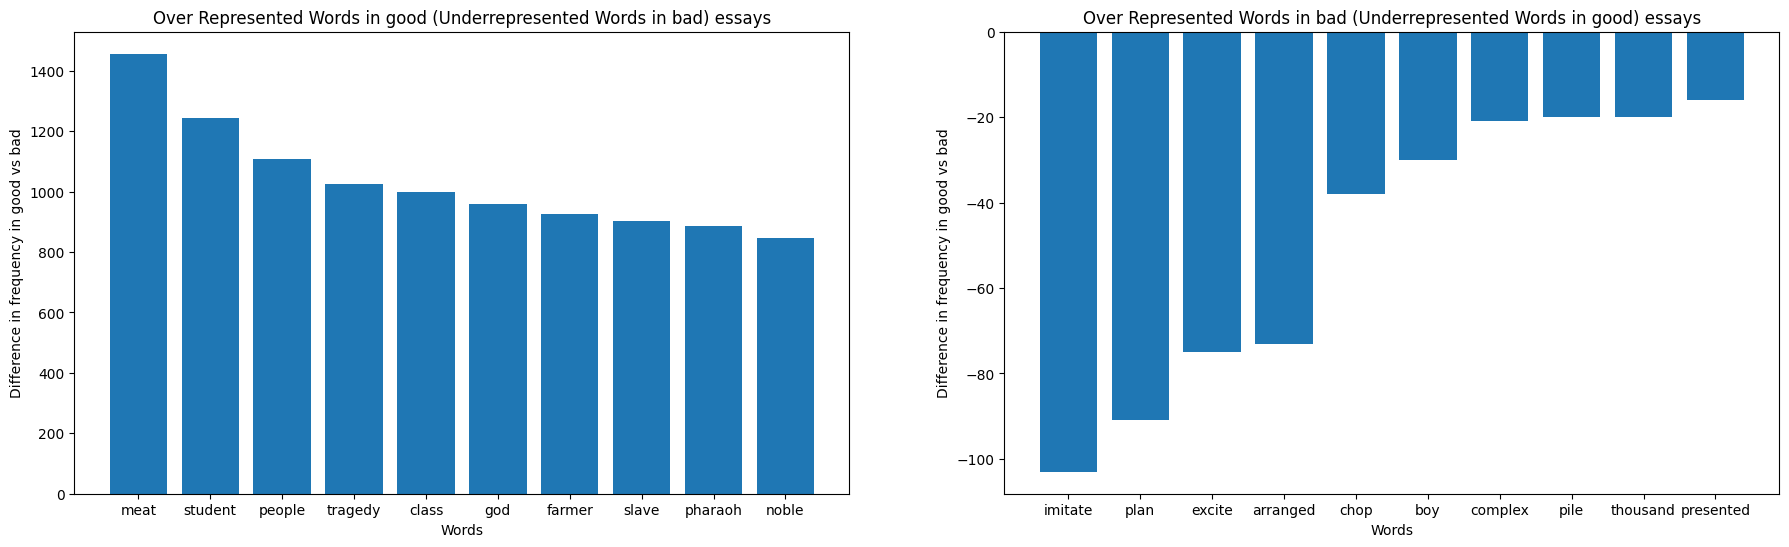

In [20]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 2, 1)
keys, values = zip(*final_list_good[:10])
plt.bar(keys, values)
plt.xlabel("Words")
plt.ylabel("Difference in frequency in good vs bad")
plt.title("Over Represented Words in good (Underrepresented Words in bad) essays")

plt.subplot(1,2,2)
keys, values = zip(*final_list_bad[:10])
plt.bar(keys, values)
plt.xlabel("Words")
plt.ylabel("Difference in frequency in good vs bad")
plt.title("Over Represented Words in bad (Underrepresented Words in good) essays")


plt.show()

## **Section 5: Three Interesting Plots (Q6, 15 points)**

<h3>Answer for Q6</h3>

<b>Plot 1</b><br>
It is a bar graph plot for average number of words and Average number of Adjectives+Adverbs grouped by different prompts. It is very interesting to see that with increasing number of Average number of Words, the number of adjectives+adverbs also increases. However, this is not true in the case of prompt_id = '39c16e'. This seems to be an anomaly where even though the average number of words are low, the number of adjectives+adverbs used is high.


<h3>References:</h3>
<ol><li> <a href="https://stackoverflow.com/questions/24183101/bar-plot-with-two-bars-and-two-y-axis">Dual Y axes Bar Chart</a>
<li> <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">df.groupby()</a>
<li><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html">Axes in Bar Chart - Matplotlib</a>
<li><a href="https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/">Sklearn Linear Regression - Tutorial</a>
<li><a href="https://pythonbasics.org/seaborn-boxplot/">Seaborn Box PLot Tutorial</a>
<li><a href="https://www.geeksforgeeks.org/bar-plot-in-matplotlib">Bar Graph Tutorial</a>
</ol>

<ipython-input-21-aef913389806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot1['prompt_id'] = df['prompt_id']


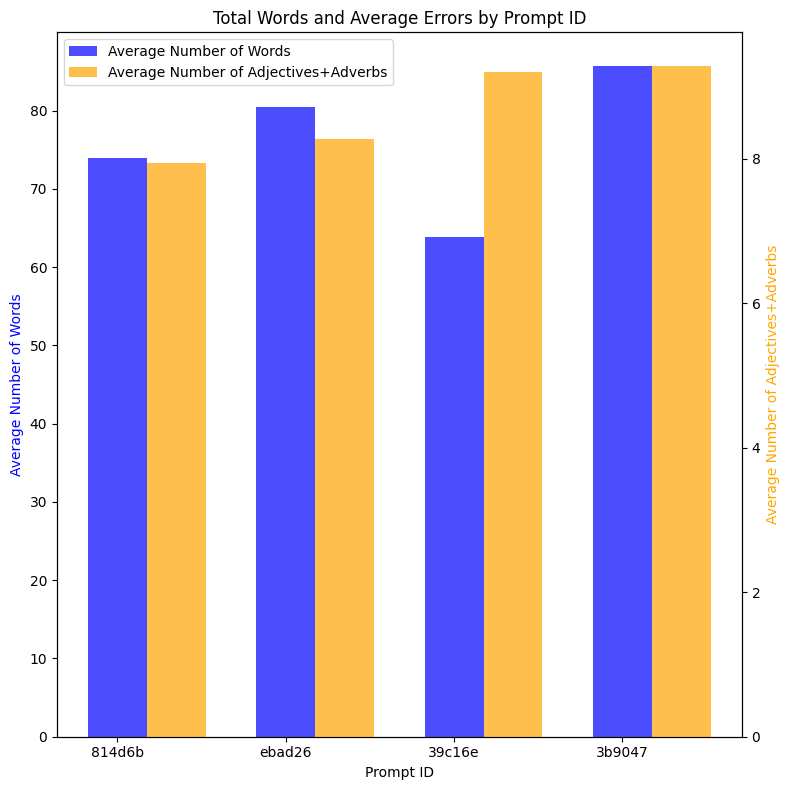

In [21]:
df_plot1 = df_subquestion2[['student_num_words','num_adj+adv']]
df_plot1['prompt_id'] = df['prompt_id']
grouped_data = df_plot1.groupby("prompt_id").agg({'num_adj+adv': 'mean', 'student_num_words': 'mean'}).reset_index()
grouped_data = grouped_data.sort_values(by='num_adj+adv')
prompt_ids = grouped_data["prompt_id"]
adj_words = grouped_data["num_adj+adv"]
avg_words = grouped_data["student_num_words"]

fig, ax1 = plt.subplots(figsize=(8, 8))
bar_width = 0.35
x = range(len(prompt_ids))
ax1.bar(x, avg_words, bar_width, label='Average Number of Words', color='b', alpha=0.7)
ax1.set_xticks(x)
ax1.set_xticklabels(prompt_ids)
ax1.set_xlabel('Prompt ID')
ax1.set_ylabel('Average Number of Words', color='b')
ax1.set_title('Total Words and Average Errors by Prompt ID')
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in x], adj_words, bar_width, label='Average Number of Adjectives+Adverbs', color='orange', alpha=0.7)
ax2.set_ylabel('Average Number of Adjectives+Adverbs', color='orange')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.tight_layout()

<b>Plot 2</b> <br>
This is a scatter plot between "Number of Rare Words" v/s "Number of Punctuations". It is evident that they are very strongly positively correlated. Most of the points in the scatter plot lie around the line drawn in the plot which can be a basis of estimation of the number of punctuations expected when there are a given number of rare words and vice-versa.

Text(0, 0.5, 'Number of Rare Words')

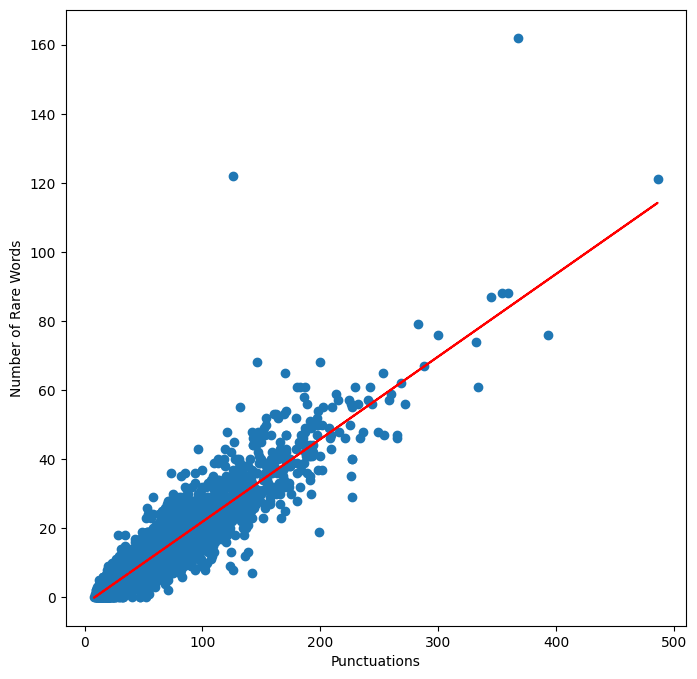

In [22]:
#plot between relative rare words and content/ wording

df_plot2 = df_subquestion2[['num_rare_words', 'num_punctuations']]

x = df_plot2['num_rare_words']
y = df_plot2['num_punctuations']
x = np.array(x).reshape(-1,1)
y = np.array(y)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
plt.figure(figsize=(8,8))
plt.scatter(x, y, label='Scatter Plot')
plt.plot(x, y_pred, color='red', label='Trend')
plt.xlabel('Punctuations')
plt.ylabel('Number of Rare Words')

<b> Plot 3</b> <br>
This is a box plot of the Number of Adjectives + Adverbs grouped by different prompts. It is interesting to notice that median amount of the sum of adjective+adverbs is almost equal in all the 4 prompts. However, the number of potential outliers (that lie beyond 1.5*IQR range) vary in different prompts. Outlier analysis can be carried out in the prompts where number of outliers seem to be more than others to get a better model

<ipython-input-23-e4c38d829839>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot3['prompt_id'] = df['prompt_id']


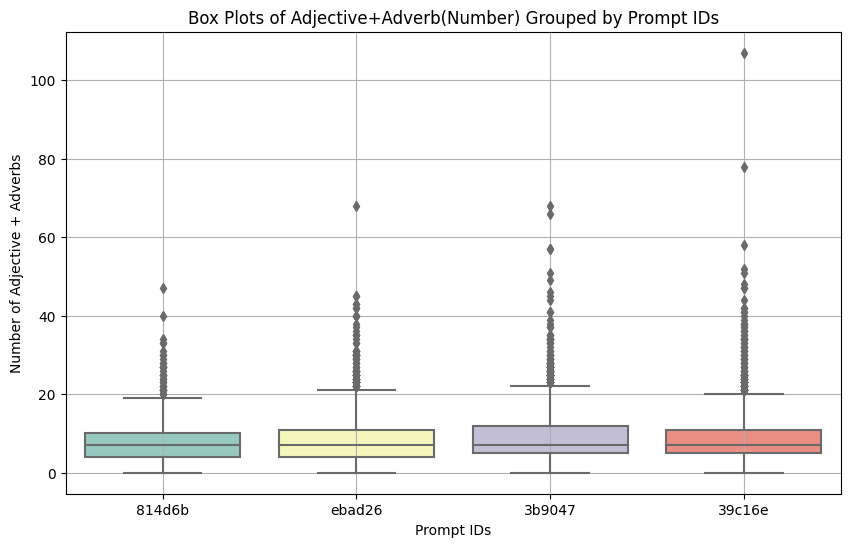

In [23]:
#plot between relative rare words and content/ wording

df_plot3 = df_subquestion2[['num_adj+adv']]
df_plot3['prompt_id'] = df['prompt_id']

plt.figure(figsize=(10, 6))
sns.boxplot(x='prompt_id', y='num_adj+adv', data=df_plot3, palette='Set3')

plt.xlabel('Prompt IDs')
plt.ylabel('Number of Adjective + Adverbs')
plt.title('Box Plots of Adjective+Adverb(Number) Grouped by Prompt IDs')

plt.grid(True)

## **Section 6: Baseline Model (Q7, 10 points)**

<h3> Answer for Q7 </h3>
The test Mean Squared Error for wording is found to be 0.52833 and for contetnt it is found to be 0.31672.
Based on these errors and the kind of parameters that we chosen, it seems that these error rates are pretty high. A linear regression model with such limited number of parameters cannot accurately predict the output values. It needs more powerful paramteres in terms of quantity or quality

<h3>References:</h3>
<ol><li> <a href="https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/">Train Test Split Usage</a>
<li> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">Sklearn Metrics (MSE)</a>
</ol>

In [24]:
#This will records the MSE of training and testing for all the outputs in the following cells
outputs = {}

In [25]:
X = df_subquestion2[['student_num_words', 'prompt_num_words', 'num_words_distinct_student',
       'num_words_distinct_prompt', 'num_common_words_prompt',
       'num_common_words_question', 'num_common_words_title']]
Y = df_subquestion2['wording']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train_word = mean_squared_error(y_train, y_train_pred)
mse_test_word = mean_squared_error(y_test, y_test_pred)
print("MSE for Training Data:", mse_train_word)
print("MSE for Testing Data:", mse_test_word)


MSE for Training Data: 0.5524235717704812
MSE for Testing Data: 0.5283363217790628


In [26]:
X = df_subquestion2[['student_num_words', 'prompt_num_words', 'num_words_distinct_student',
       'num_words_distinct_prompt', 'num_common_words_prompt',
       'num_common_words_question', 'num_common_words_title']]
Y = df_subquestion2['content']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train_content = mean_squared_error(y_train, y_train_pred)
mse_test_content = mean_squared_error(y_test, y_test_pred)
print("MSE for Training Data:", mse_train_content)
print("MSE for Testing Data:", mse_test_content)

outputs['Initial Features (MODEL 0)'] = {
    'mse_train_word' : mse_train_word,
    'mse_test_word' :  mse_test_word,
    'mse_train_content' : mse_train_content,
    'mse_test_content' : mse_test_content
}

MSE for Training Data: 0.3419419702180487
MSE for Testing Data: 0.31672177516845973


## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

<h2>Preprocessing</h2>

We can try to normalize each feature to a value between (-1 and 1). This will help us in the following ways: <ol>
<li> Faster Convergence of the Linear Regression model
<li> We can accurately understand which parameters are given more weightage when compared to others.
</ol>
Elaborating on the second point, if we know which parameter has more weightage, we can maybe preprocess that particular data more to generate better outputs.

<h2>Outlier Detection and Removal</h2>
For the parameter identified above as more effectve, we can remove the outliers to better fit the data. This outlier removal is expected to yield better results.
<br>
<br>

---

The following cells are in this order: <ol><h3>Preprocessing Steps</h3>
<li> Min Max Normalization of all the features
<li> Linear Regression Model fitting without outlier removal. Here, we find the most effective parameter on which we can do outlier analysis and removal.
<li> Outlier removal
<h3>MODEL 1 Implementation</h3>
<li> (MODEL 1) Using Clean Features Linear Regression Model fitting with normalization and outlier removal.
<li> (MODEL 2) Using XGBOOST Regressor for fitting the same data as used in MODEL 1
<li> Comparison of the models

<h3>References:</h3>
<ol><li> <a href="https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/">Min Max Scaler Transform Tutorial</a>
<li> <a href="https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features">Getting Coefficients in Sklearn Linear Regression</a>
<li><a href="https://www.askpython.com/python-modules/tabulate-tables-in-python">Python Tabulate</a>
<li><a href="https://stackoverflow.com/questions/43264095/python-seaborn-how-are-outliers-determined-in-boxplots">Outlier Detection using boxplot</a>
<li><a href="https://www.digitalocean.com/community/tutorials/normalize-data-in-python">Data Normalization Using Scikit learn</a>
<li><a href="https://machinelearningmastery.com/xgboost-for-regression/">XGBoost Regression</a>
<li><a href="https://statisticsbyjim.com/regression/interpret-r-squared-regression/">R Squared Score- Regression Analysis</a>

</ol>

In [27]:
#Min Max Normalization
scaler = MinMaxScaler(feature_range=(-1, 1))

X = df_subquestion2[['student_num_words', 'prompt_num_words', 'num_words_distinct_student',
       'num_words_distinct_prompt', 'num_common_words_prompt',
       'num_common_words_question', 'num_common_words_title', 'num_rare_words',
       'num_grammatical_mistakes', 'max_word_length', 'num_punctuations',
       'num_adj+adv']]  # Replace with your actual feature columns

X_scaled = scaler.fit_transform(X)

In [28]:
#Linear Regression model without outlier removal
Y = df_subquestion2['content']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train_content = mean_squared_error(y_train, y_train_pred)
mse_test_content = mean_squared_error(y_test, y_test_pred)
print("MSE for Training Data for word:", mse_train_content)
print("MSE for Testing Data for word:", mse_test_content)

Y = df_subquestion2['wording']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train_word = mean_squared_error(y_train, y_train_pred)
mse_test_word = mean_squared_error(y_test, y_test_pred)
print("MSE for Training Data for content:", mse_train_word)
print("MSE for Testing Data for content:", mse_test_word)

outputs['Final Features with normalization'] = {
    'mse_train_word' : mse_train_word,
    'mse_test_word' :  mse_test_word,
    'mse_train_content' : mse_train_content,
    'mse_test_content' : mse_test_content
}

#Detection of most effect parameter
headers = ["Features", "Coefficients"]
#Print the coefficients
max_str = ""
max = -100
coefficients = model.coef_
intercept = model.intercept_
data_tuple = list(zip(X.columns, coefficients))
print(tabulate(data_tuple, headers, tablefmt="grid"))
for feat, coeff in data_tuple:
  if coeff>max:
    max_str = feat
    max = coeff
print()
print(f"Maximum coefficient is: {max} for the feature '{max_str}'")

MSE for Training Data for word: 0.33515958075039526
MSE for Testing Data for word: 0.3155785761661651
MSE for Training Data for content: 0.5142690703231899
MSE for Testing Data for content: 0.511866875922064
+----------------------------+----------------+
| Features                   |   Coefficients |
+============================+================+
| student_num_words          |       4.74585  |
+----------------------------+----------------+
| prompt_num_words           |       0.402972 |
+----------------------------+----------------+
| num_words_distinct_student |       5.27427  |
+----------------------------+----------------+
| num_words_distinct_prompt  |      -0.470161 |
+----------------------------+----------------+
| num_common_words_prompt    |      -8.44165  |
+----------------------------+----------------+
| num_common_words_question  |       1.12221  |
+----------------------------+----------------+
| num_common_words_title     |       0.665393 |
+-----------------------

Now that we know which feature affects the result the most for predicting content, let's try to remove potential outliers from the dataframe

Text(0.5, 1.0, 'Box Plot for num_words_distinct_student')

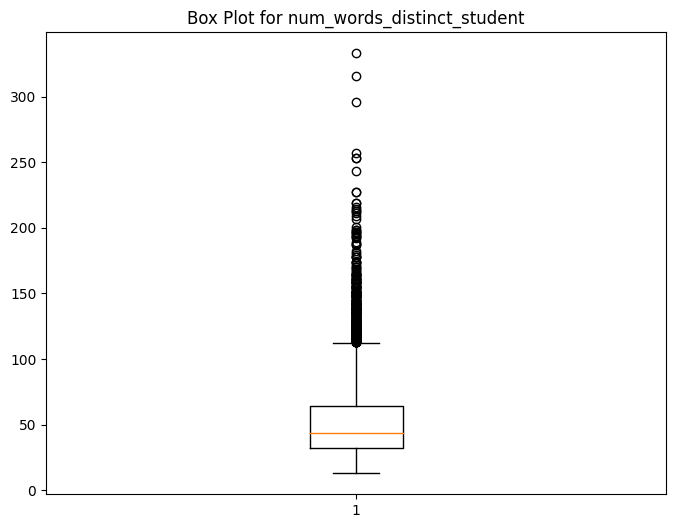

In [29]:
#remove outliers in the column with max weight

column_name = 'num_words_distinct_student'
column_to_plot = df_subquestion2[column_name]

plt.figure(figsize=(8, 6))
plt.boxplot(column_to_plot)
plt.title(f'Box Plot for {column_name}')

We can see that a lot of values lie out Q3 + 1.5*IQR range. If we remove all these outliers then it might remove a lot of data from our dataset. Let's test outlier removal with the 3*IQR range above the 3rd quantile. Also, let's look at the number of outliers. If it is small when compared to total number of records (of the order 7k) then we can work with it

In [30]:
Q1 = df_subquestion2[column_name].quantile(0.25)
Q3 = df_subquestion2[column_name].quantile(0.75)
IQR = Q3 - Q1


threshold = 3

upper_bound = Q3 + threshold * IQR
outliers = df_subquestion2[df_subquestion2[column_name] > upper_bound]
filtered_df = df_subquestion2[df_subquestion2[column_name] <= upper_bound]

print("Outliers:")
print(len(outliers))

Outliers:
63


Let's try working with filereted and normalized data now. This is the implementation of Model 1

---

Results for Model 1:<br>
Testing data MSE for content = 0.2906
Testing data MSE for wording = 0.47998<br>

As we can see, it is a significant improvement from the previous unnormalized version


In [31]:
Y = filtered_df['content']
X = filtered_df[['student_num_words', 'prompt_num_words', 'num_words_distinct_student',
       'num_words_distinct_prompt', 'num_common_words_prompt',
       'num_common_words_question', 'num_common_words_title', 'num_rare_words',
       'num_grammatical_mistakes', 'max_word_length', 'num_punctuations',
       'num_adj+adv']]

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train_content = mean_squared_error(y_train, y_train_pred)
mse_test_content = mean_squared_error(y_test, y_test_pred)
print("MSE for Training Data for content:", mse_train_content)
print("MSE for Testing Data for content:", mse_test_content)

MSE for Training Data for content: 0.2737095397152516
MSE for Testing Data for content: 0.2906018236500912


In [32]:
Y = filtered_df['wording']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train_word = mean_squared_error(y_train, y_train_pred)
mse_test_word = mean_squared_error(y_test, y_test_pred)
print("MSE for Training Data for word:", mse_train_word)
print("MSE for Testing Data for word:", mse_test_word)

outputs['Final Features with normalization and removed outliers (MODEL 1)'] = {
    'mse_train_word' : mse_train_word,
    'mse_test_word' :  mse_test_word,
    'mse_train_content' : mse_train_content,
    'mse_test_content' : mse_test_content
}

MSE for Training Data for word: 0.4888735833107021
MSE for Testing Data for word: 0.4799871217723284


This is MODEL 2. <br>
Following are the results for the same:
Test MSE for wording = 0.4216 and Test MSE for content = 0.2492<br>
Here, I have also shown the R-Squared test which has a value between 0 and 1. The closer the value to 1, better is the model in explaining the variance in the data. <br>

R^2 for content = 0.7649
R^2 for wording = 0.5894

In [33]:
Y = filtered_df['content']
X = filtered_df[['student_num_words', 'prompt_num_words', 'num_words_distinct_student',
       'num_words_distinct_prompt', 'num_common_words_prompt',
       'num_common_words_question', 'num_common_words_title', 'num_rare_words',
       'num_grammatical_mistakes', 'max_word_length', 'num_punctuations',
       'num_adj+adv']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg.fit(X_train, y_train)
y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

mse_train_content = mean_squared_error(y_train, y_train_pred)
mse_test_content = mean_squared_error(y_test, y_test_pred)
print("MSE for Training Data for content:", mse_train_content)
print("MSE for Testing Data for content:", mse_test_content)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R Squared test gives the output: {r2_test}")


MSE for Training Data for content: 0.1894592741475214
MSE for Testing Data for content: 0.24922324355022984
R Squared test gives the output: 0.7648858520087689


In [34]:
Y = filtered_df['wording']
X = filtered_df[['student_num_words', 'prompt_num_words', 'num_words_distinct_student',
       'num_words_distinct_prompt', 'num_common_words_prompt',
       'num_common_words_question', 'num_common_words_title', 'num_rare_words',
       'num_grammatical_mistakes', 'max_word_length', 'num_punctuations',
       'num_adj+adv']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg.fit(X_train, y_train)
y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

mse_train_word = mean_squared_error(y_train, y_train_pred)
mse_test_word = mean_squared_error(y_test, y_test_pred)
# print(mse_train, mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("MSE for Training Data for content:", mse_train_word)
print("MSE for Testing Data for content:", mse_test_word)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R Squared test gives the output: {r2_test}")

outputs['Final Features with normalization and removed outliers on XGBoost (MODEL 2)'] = {
    'mse_train_word' : mse_train_word,
    'mse_test_word' :  mse_test_word,
    'mse_train_content' : mse_train_content,
    'mse_test_content' : mse_test_content
}

MSE for Training Data for content: 0.3609255077697172
MSE for Testing Data for content: 0.421684179879701
R Squared test gives the output: 0.5894709022556079


<h3>Comparison</h3>
The following part is about comparison of the outputs obtained. The following conclusions can be drawn from the graph and the table:
<li>As we can see, Model 0 has the least number of parameters and performs poorly compared to the other models. This can be attributed to the type of model and the number of parameters.
<li>Model 1 has more paramteres than Model 0 with better preprocessing of the data. This improves the model by a certain amount but it cannot be increased beyond a point. This can be because this type of problem cannot be solved using a linear system of paramters. It might need some paramteres that can be related to each other in a polynomial scale.
<li> Model 2 uses XGBOOST Regressor. This model performs the best in comparison to the previous models even though the input paramters are the same. This can be attributed to the fact that this model has the ability to incorporate more than linear mapping of the parameters.
<li> From the graph it is evident that, with better model or better parameters or with better preprocessing of the data, performance of a machine learning model can be improved.<br>

In [35]:
output_df = pd.DataFrame(outputs)
print(tabulate(output_df,headers='keys',tablefmt='pretty'))

+-------------------+----------------------------+-----------------------------------+------------------------------------------------------------------+-----------------------------------------------------------------------------+
|                   | Initial Features (MODEL 0) | Final Features with normalization | Final Features with normalization and removed outliers (MODEL 1) | Final Features with normalization and removed outliers on XGBoost (MODEL 2) |
+-------------------+----------------------------+-----------------------------------+------------------------------------------------------------------+-----------------------------------------------------------------------------+
|  mse_train_word   |     0.5524235717704812     |        0.5142690703231899         |                        0.4888735833107021                        |                             0.3609255077697172                              |
|   mse_test_word   |     0.5283363217790628     |         0.51186687592

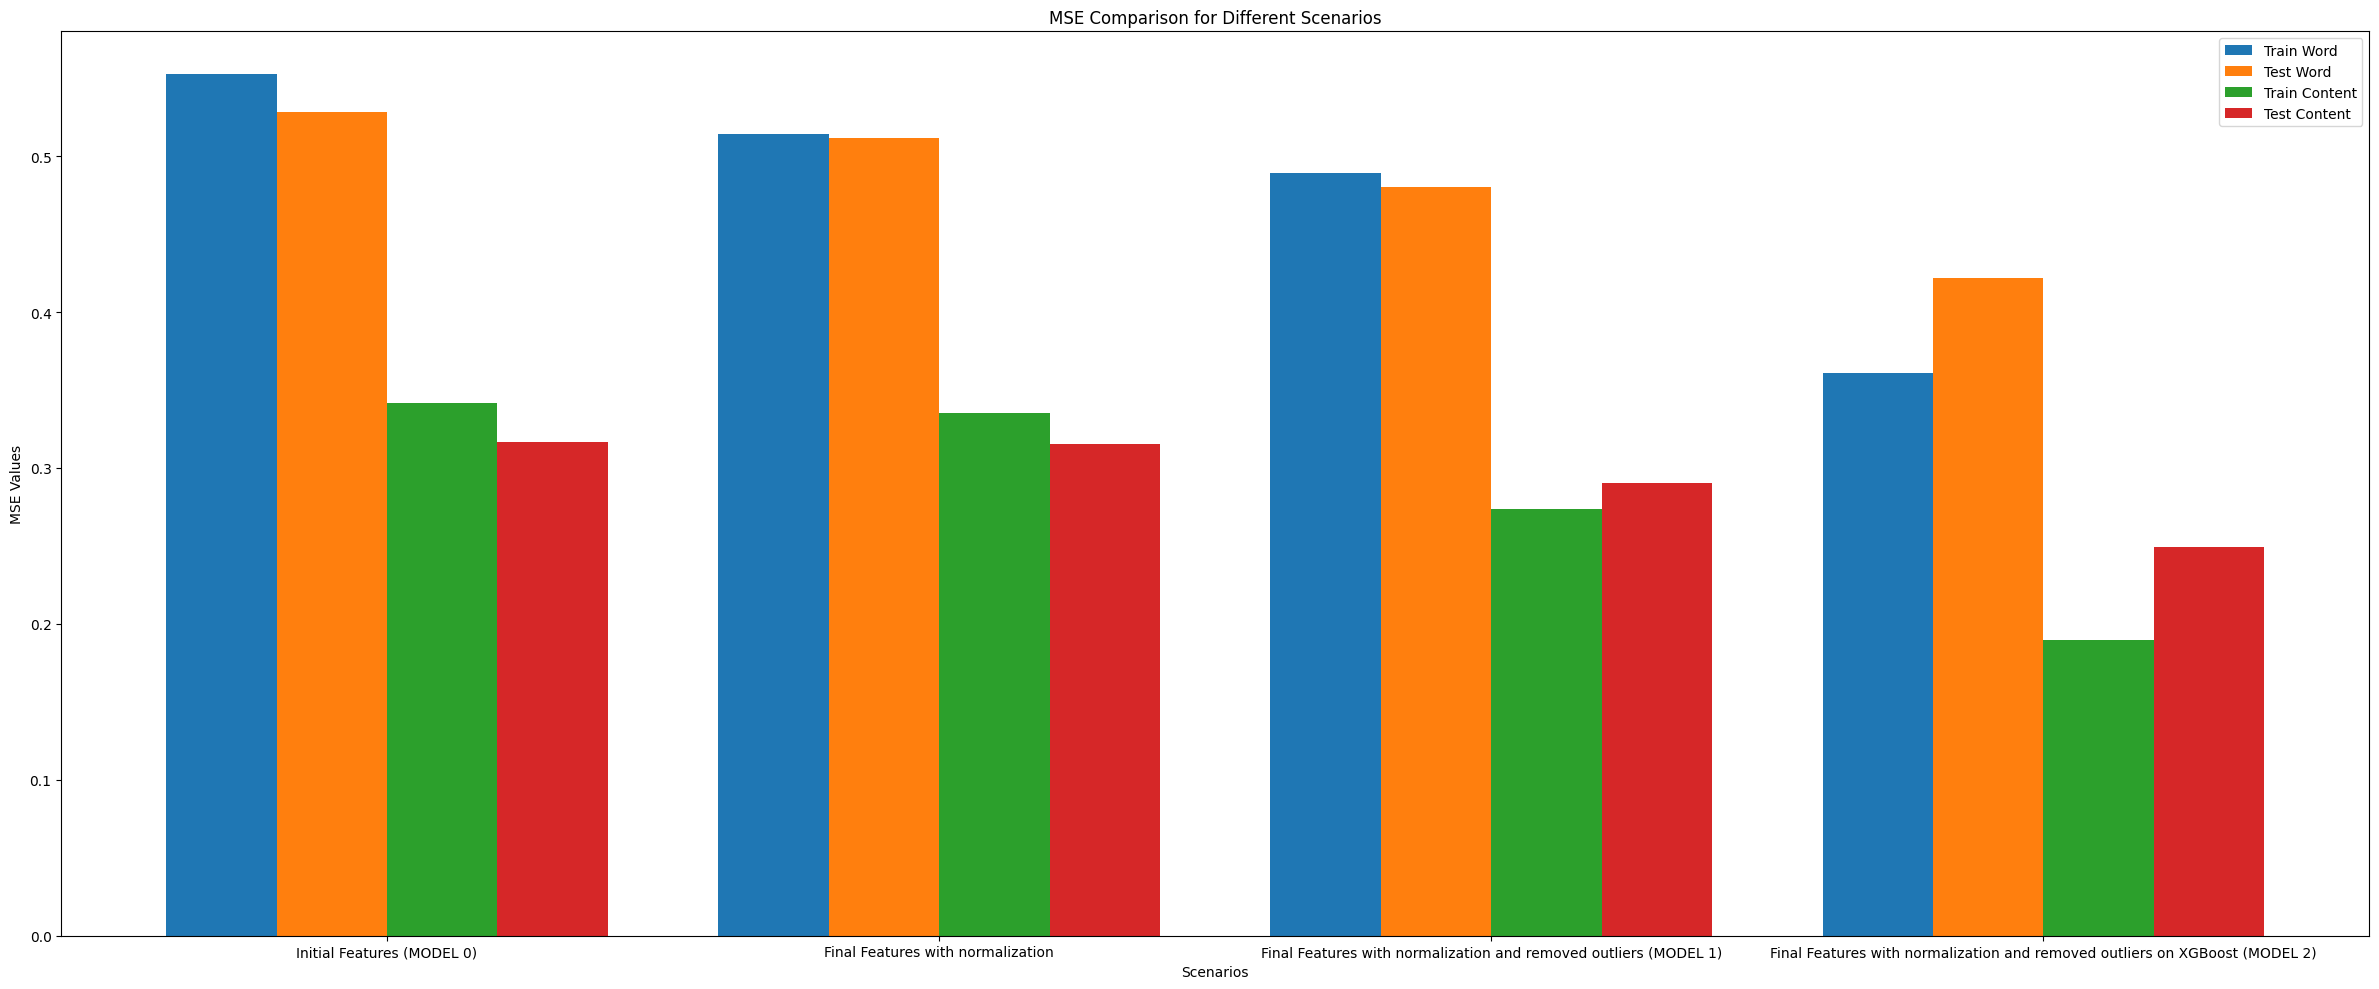

In [36]:
scenarios = list(outputs.keys())
mse_train_word = [outputs[scenario]['mse_train_word'] for scenario in scenarios]
mse_test_word = [outputs[scenario]['mse_test_word'] for scenario in scenarios]
mse_train_content = [outputs[scenario]['mse_train_content'] for scenario in scenarios]
mse_test_content = [outputs[scenario]['mse_test_content'] for scenario in scenarios]

width = 0.2
x = range(len(scenarios))

fig, ax = plt.subplots(figsize=(24,10))
plt.bar(x, mse_train_word, width, label='Train Word')
plt.bar([i + width for i in x], mse_test_word, width, label='Test Word')
plt.bar([i + 2 * width for i in x], mse_train_content, width, label='Train Content')
plt.bar([i + 3 * width for i in x], mse_test_content, width, label='Test Content')
plt.xlabel('Scenarios')
plt.ylabel('MSE Values')
plt.title('MSE Comparison for Different Scenarios')
plt.xticks([i + 1.5 * width for i in x], scenarios)
plt.tight_layout()
plt.legend()


## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):